## **0. Introduction**

This notebook follows after the "Logistic_Regression.iypnb" notebook. Aim of this notebook is to conduct the Support Vector Machine algorithm. 

## **1. Masking**

As in the Logistic Regression notebook, we will first load the masks, load the data and then apply the mask. I will not explain each step, because this has already been described in the aformentioned notebook.

In [1]:
import os

os.chdir("/home/jpauli/ds001506/sourcedata/sub-02/anat")
os.listdir()

['sub-02_mask_LH_FFA.nii.gz',
 'sub-02_mask_LH_hV4.nii.gz',
 'sub-02_mask_LH_HVC.nii.gz',
 'sub-02_mask_LH_LOC.nii.gz',
 'sub-02_mask_LH_PPA.nii.gz',
 'sub-02_mask_LH_V1d.nii.gz',
 'sub-02_mask_LH_V1v.nii.gz',
 'sub-02_mask_LH_V2d.nii.gz',
 'sub-02_mask_LH_V2v.nii.gz',
 'sub-02_mask_LH_V3d.nii.gz',
 'sub-02_mask_LH_V3v.nii.gz',
 'sub-02_mask_RH_FFA.nii.gz',
 'sub-02_mask_RH_hV4.nii.gz',
 'sub-02_mask_RH_HVC.nii.gz',
 'sub-02_mask_RH_LOC.nii.gz',
 'sub-02_mask_RH_PPA.nii.gz',
 'sub-02_mask_RH_V1d.nii.gz',
 'sub-02_mask_RH_V1v.nii.gz',
 'sub-02_mask_RH_V2d.nii.gz',
 'sub-02_mask_RH_V2v.nii.gz',
 'sub-02_mask_RH_V3d.nii.gz',
 'sub-02_mask_RH_V3v.nii.gz']

In [5]:
mask_img_path = '/home/jpauli/ds001506/sourcedata/sub-02/anat'
mask_img_L = os.path.join(mask_img_path,'sub-02_mask_LH_LOC.nii.gz')
mask_img_R = os.path.join(mask_img_path,'sub-01_mask_RH_PPA.nii.gz')

In [6]:
from nilearn.maskers import NiftiMasker
nifti_masker = NiftiMasker(mask_img=mask_img_L)

In [84]:
X = []
Y = []
Sessions = []
category = 1
for session in ["1","2","3"]:
    os.chdir('/mnt/c/Users/janos/git/sessions_2/z_maps_{}_masked'.format(session))
    for x in os.listdir():
        if x == 'nilearn_cache':
            continue
        else:
            X.append(nifti_masker.fit_transform(x))
            Y.append(category)
            Sessions.append(session)
            category=category+1
            if category == 27:
                category = 1

In [86]:
import numpy as np
import pandas as pd

Y = np.array(Y)
Y_ses = np.array(Sessions)
df =  pd.DataFrame(np.concatenate(X))
X_ = df.to_numpy()




## **1.0 Support Vector Machine**

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif, k=10).fit_transform(X_, Y)
X_new.shape

(78, 10)

In [88]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.2,random_state=42)

In [89]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_s = scaler.fit_transform(X_train)

In [90]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
clf = svm.SVC(C = 0.01, kernel='linear') # Linear Kernel

clf.fit(X_train_s, y_train)

y_pred = clf.predict(scaler.transform(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       2.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       2.0
          20       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       1.0
          23       0.00    

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

In [91]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf','sigmoid']} 
  
grid = GridSearchCV(svm.SVC(), param_grid,cv = 2,refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train_s, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.000 total time=   0.0s
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.000 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=pol

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


[CV 1/2] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/2] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 1/2] END ...C=1, gamma=0.001, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/2] END ...C=1, gamma=0.001, kernel=linear;, score=0.000 total time=   0.0s
[CV 1/2] END .....C=1, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/2] END .....C=1, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/2] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/2] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 1/2] END ..C=1, gamma=0.0001, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/2] END ..C=1, gamma=0.0001, kernel=linear;, score=0.000 total time=   0.0s
[CV 1/2] END ....C=1, gamma=

[CV 2/2] END ..C=1000, gamma=0.1, kernel=linear;, score=0.000 total time=   0.0s
[CV 1/2] END ....C=1000, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/2] END ....C=1000, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/2] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/2] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/2] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/2] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 1/2] END .C=1000, gamma=0.01, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/2] END .C=1000, gamma=0.01, kernel=linear;, score=0.000 total time=   0.0s
[CV 1/2] END ...C=1000, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/2] END ...C=1000, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/2] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/2] END ....C=1000, gam

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [51]:
#print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'sigmoid'}
SVC(C=1000, gamma=0.01, kernel='sigmoid')


In [92]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       2.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       2.0
          21       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0

    accuracy              

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

In [93]:
y_train

array([ 6,  7, 10,  6, 10, 14, 16,  2, 15, 17, 17, 22, 25,  8,  3, 23, 20,
       18, 20, 14, 26,  4, 14,  5,  4, 18, 13,  9, 11,  7, 11, 24, 13, 21,
       25, 16,  2, 16,  1, 23, 25, 18, 19,  6, 12,  7, 22,  8, 12, 17, 12,
        4,  2,  1, 22,  3, 24, 21,  9, 20, 15, 26])

In [94]:
grid.predict(X_train_s)

array([ 6,  7, 10,  6, 10, 14, 16,  2, 15, 17, 17, 22, 25,  8,  3, 23, 20,
       18, 20, 14, 26,  4, 14,  5,  4, 18, 13,  9, 11,  7, 11, 24, 13, 21,
       25, 16,  2, 16,  1, 23, 25, 18, 19,  6, 12,  7, 22,  8, 12, 17, 12,
        4,  2,  1, 22,  3, 24, 21,  9, 20, 15, 26])

In [95]:
grid.score(X_train_s,y_train)

1.0

In [96]:
grid.score(X_test,y_test)

0.0

In [21]:
Y_unique = np.unique(Y)
Y_unique

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

In [97]:
np.random.shuffle(Y)
y_train = []
y_test = []


for category in Y:
        if len(y_test) == len(Y_unique):
            y_train.append(category)
        else:
            y_test.append(category)
            if y_test.count(category) > 1:
                y_test.remove(category)
                y_train.append(category)
                continue
            
                

In [98]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [99]:
X_train, X_test = train_test_split(X_, test_size=0.33, random_state=42)

In [100]:
X_train_s_new = scaler.fit_transform(X_train)

In [101]:
X_train.shape

(52, 888)

In [102]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf','sigmoid']} 
  
grid = GridSearchCV(svm.SVC(), param_grid,cv = 2,refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train_s_new, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.038 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.115 total time=   0.0s
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.077 total time=   0.0s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.038 total time=   0.0s
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.038 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.115 total time=   0.0s
[CV 1/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.038 total time=   0.0s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.115 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.077 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=pol

[CV 2/2] END ....C=100, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 1/2] END ...C=100, gamma=0.1, kernel=linear;, score=0.038 total time=   0.0s
[CV 2/2] END ...C=100, gamma=0.1, kernel=linear;, score=0.115 total time=   0.0s
[CV 1/2] END .....C=100, gamma=0.1, kernel=poly;, score=0.077 total time=   0.0s
[CV 2/2] END .....C=100, gamma=0.1, kernel=poly;, score=0.038 total time=   0.0s
[CV 1/2] END ......C=100, gamma=0.1, kernel=rbf;, score=0.038 total time=   0.0s
[CV 2/2] END ......C=100, gamma=0.1, kernel=rbf;, score=0.115 total time=   0.0s
[CV 1/2] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/2] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 1/2] END ..C=100, gamma=0.01, kernel=linear;, score=0.038 total time=   0.0s
[CV 2/2] END ..C=100, gamma=0.01, kernel=linear;, score=0.115 total time=   0.0s
[CV 1/2] END ....C=100, gamma=0.01, kernel=poly;, score=0.077 total time=   0.0s
[CV 2/2] END ....C=100, gamm

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [103]:
grid.score(scaler.transform(X_test), y_test)

0.038461538461538464

In [104]:
grid.score(X_train_s_new, y_train)

1.0

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA() #n_components = 10
pca.fit(X_)

PCA()

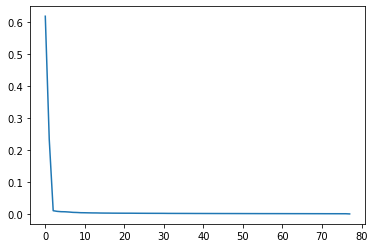

In [72]:
plt.plot(pca.explained_variance_ratio_)

In [73]:
X_transform = pca.transform(X_)

Text(0, 0.5, 'Samples')

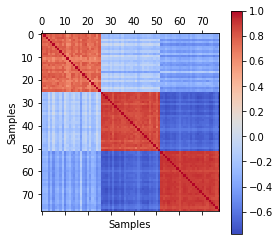

In [74]:
import matplotlib.pyplot as plt
corr =np.corrcoef(X_transform)
plt.matshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Samples')
plt.ylabel('Samples')

Text(0, 0.5, 'PC 2')

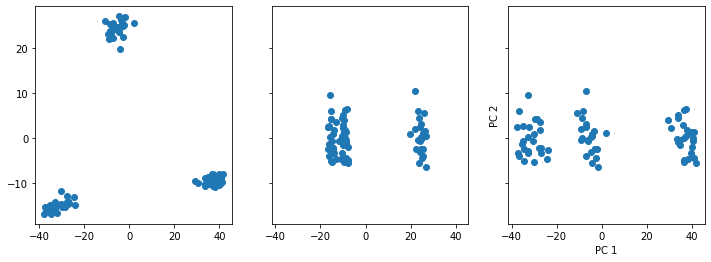

In [81]:
fig, ax =plt.subplots(figsize=(12, 4), ncols=3, sharey=True, sharex=True)
ax[0].scatter(X_transform[:, 0], X_transform[:, 1])
ax[1].scatter(X_transform[:, 1], X_transform[:, 2])
ax[2].scatter(X_transform[:, 0], X_transform[:, 2])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [82]:
rand_X = np.random.normal(size=X_.shape)
pca_rand = PCA()
pca_rand.fit(rand_X)

PCA()

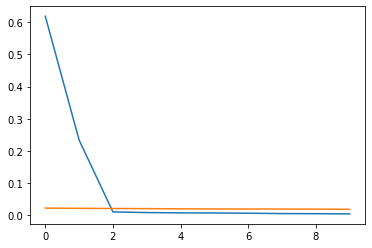

In [83]:
plt.plot(pca.explained_variance_ratio_[:10])
plt.plot(pca_rand.explained_variance_ratio_[:10])